In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [6]:
# define the start date, end date, as well as stock symbol
start = '2018-01-01'
end = '2024-12-31'
stock= 'GOOG'

In [7]:
# Download historical stock data using the Yahoo Finance API (yfinance)
# stock: ticker symbol of the stock you're interested in, "AAPL" for Apple, "GOOG" for google
# start: the starting date of the data range (ex: Jan 1, 2018)
# end: the edn date of the data range (ex: Dec 31, 2024)
data = yf.download(stock, start, end)

# reset the index of the dataframe so that the date becomes a regular column instead of the index
data.reset_index(inplace=True)

# Drop any rows with misssing data from the dataset
data.dropna(inplace= True)

[*********************100%***********************]  1 of 1 completed


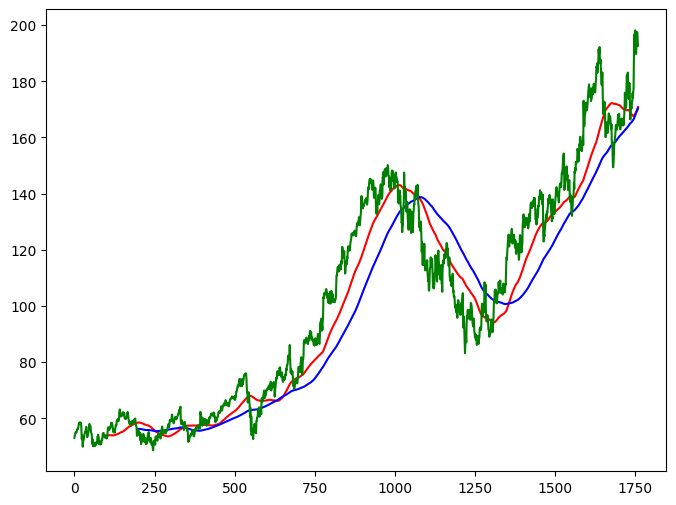

In [9]:
ma_100_days = data.Close.rolling(100).mean()
ma_200_days = data.Close.rolling(200).mean()

plt.figure(figsize=(8,6))

plt.plot(ma_100_days, 'r')
plt.plot(ma_200_days, 'b')
plt.plot(data.Close, 'g')
plt.show()

In [10]:
data_train = pd.DataFrame(data.Close[0: int(len(data)*0.80)])
data_test = pd.DataFrame(data.Close[int(len(data)*0.80): len(data)])

data_train.shape[0]

data_test.shape[0]

352

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

data_train_scale = scaler.fit_transform(data_train)
x = []
y = []
for i in range(100, data_train_scale.shape[0]):
    x.append(data_train_scale[i - 100:i])
    y.append(data_train_scale[i, 0])

x, y = np.array(x), np.array(y)
from tensorflow.keras.layers import Dense, Dropout, LSTM, Input
from tensorflow.keras.models import Sequential

In [12]:
# Create a Sequential model
model = Sequential()

# Add an Input layer to define the input shape
model.add(Input(shape=(x.shape[1], 1)))

# Add the LSTM layer
model.add(LSTM(units=50, activation='relu', return_sequences=True))

# Add a Dropout layer to prevent overfitting
model.add(Dropout(0.2))

In [13]:
model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.3))

In [14]:
model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.4))

In [15]:
model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

In [16]:
model.add(Dense(units = 1))

In [18]:
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [19]:
model.fit(x, y, epochs = 50, batch_size = 32, verbose=1)

Epoch 1/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 6s 111ms/step - loss: 0.1128
Epoch 2/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - loss: 0.0128
Epoch 3/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0113
Epoch 4/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 113ms/step - loss: 0.0107
Epoch 5/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 118ms/step - loss: 0.0103
Epoch 6/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0109
Epoch 7/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0085
Epoch 8/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 122ms/step - loss: 0.0082
Epoch 9/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - loss: 0.0101
Epoch 10/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 117ms/step - loss: 0.0079
Epoch 11/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0071
Epoch 12/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0074
Epoch 13/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 115ms/step - loss: 0.0077
Epoch 14/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - loss: 0.0058
Epoch 15/50
41/41 ━━━━━━━━━━━━━━━━━━━━ 5s 114ms/step - lo

In [20]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 536,285 (2.05 MB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 357,524 (1.36 MB)

In [21]:
past_100_days = data_train.tail(100)

In [22]:
data_test = pd.concat([past_100_days, data_test], ignore_index = True)

In [23]:
data_test_scale = scaler.fit_transform(data_test)

In [24]:
x = []
y = []
for i in range(100, data_test_scale.shape[0]):
    x.append(data_test_scale[i - 100:i])
    y.append(data_test_scale[i, 0])
x, y = np.array(x), np.array(y)

In [25]:
y_predict = model.predict(x)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step


In [26]:
scale = 1/scaler.scale_

In [27]:
y_predict = y_predict*scale

In [28]:
y = y*scale

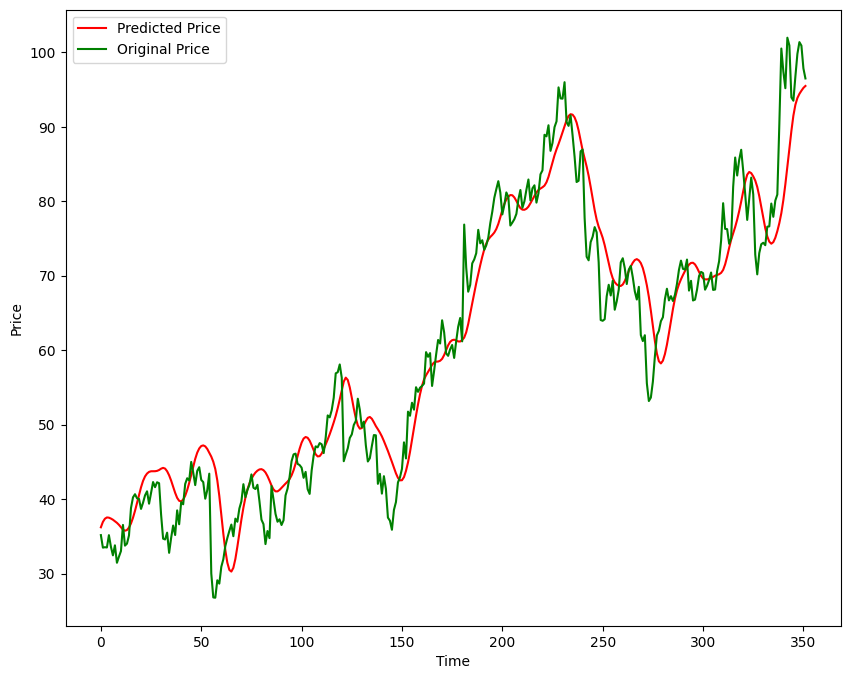

In [29]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label = 'Predicted Price')
plt.plot(y, 'g', label = 'Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [30]:
model.save('Stock Predictions Model.keras')